In [57]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, sqrt, e, log, isclose, exp
from scipy.optimize import basinhopping

We already *know* what the shape of each particle's curve given a q and fres should look like, it's just 1/ f-fres^2 - just sum each contribution, envelope, with basinhopper

Relaxation time might itself change with freq.

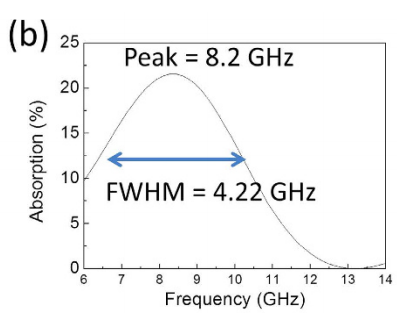

This problem has a long history, stretching back to Cole-Cole's landmark paper in 1942

The curve is called "the Lorentzian". 

This field is also called "Multivariate curve resolution" or 

Assuming that the resonant frequency and Q factor distributions are gaussian, we fit the gaussian average and std. dev. of each. We also have to fit the covariance of Q with w0.

Digitized with engauge digitizer

In [44]:
curve_file = "../biology/data/figure_6a_Yang_digitized.csv"
curve = np.genfromtxt(open(curve_file, "r"), delimiter=",", dtype=np.float, encoding='ascii', skip_header=1)

curve[:,0] *= 1e9
curve[:,1] = curve[:,1] / np.max(curve[:,1]) #normalize


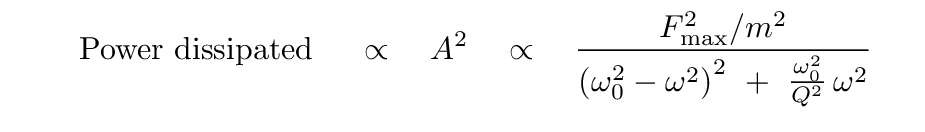

from http://spiff.rit.edu/classes/phys283/lectures/forced_ii/forced_ii.html

(careful now! power vs amplitude! might have made a mistake here, re-check later!) 

$$\omega_r = \omega_0 \sqrt{1 - 2\zeta^2}$$

where $\zeta = \frac{1}{2 Q}$

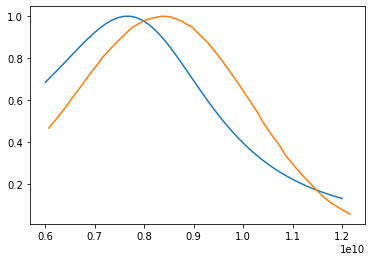

In [62]:
Q = 1.95
f_res = 8.22e9

def power_absorption_curve(f_res, Q, frequencies):
    # M and Fmax 
    angular_freq_res = 2.0*pi*f_res
    angular_frequencies = 2.0*pi*frequencies
    term_1 = ((angular_freq_res**2.0 - angular_frequencies**2.0)**2.0)
    term_2 = ((angular_freq_res**2.0)/(Q**2.0)) * (angular_frequencies**2.0)
        
    curve = 1/(term_1 + term_2)
    curve = curve / np.max(curve) #normalize

    
    return curve
    
frequencies = np.linspace(6e9, 12e9)
simple_curve = power_absorption_curve(f_res, Q, frequencies)
plt.plot(frequencies,simple_curve)
plt.plot(curve[:,0],curve[:,1])

In [17]:

def sample_from_distribution():

    means = [mean_diameter, mean_mass, mean_breaking_force, mean_charge, mean_k]

    var_diameter = (sigma_diameter**2.0) #variance is the square of the standard deviation.
    var_mass = (sigma_mass**2.0) #inertia is a property of matter.
    var_breaking_force = (sigma_breaking_force**2.0)
    var_charge = (sigma_charge**2.0)
    var_spring_constant = (sigma_spring_constant**2.0)


    #diameter varies with diameter, varies with mass, with breaking force, and with charge
    cov_diameter =        [var_diameter, sigma_diameter*sigma_mass*0.95, 0, 0, 0]

    cov_mass =            [sigma_diameter*sigma_mass*0.95, var_mass, 0, 0, 0]

    cov_breaking_force =  [0, 0, var_breaking_force, 0, 0]

    cov_charge =          [0, 0, 0, var_charge, 0]

    cov_spring_constant = [0, 0, 0, 0, var_spring_constant]


    covariance_matrix = [cov_diameter, 
                         cov_mass,
                         cov_breaking_force,
                         cov_charge,
                         cov_spring_constant]




    covariance_matrix = np.array(covariance_matrix) #must be symmetric positive semidefinite;
    #eigenvalues must be 

    diameter_samples,mass_samples,breaking_force_samples,charge_samples, spring_constant_samples\
                    = np.random.multivariate_normal(means, covariance_matrix, N).T


    diameter_samples = diameter_samples.T #first .T lets us access with ,, operator, second .T gets us our 1d array back
    mass_samples = mass_samples.T